In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py

from scipy.optimize import curve_fit

import glob

import matplotlib as mpl
mpl.rcParams['font.size']=16
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"

from matplotlib.gridspec import GridSpec

In [2]:
def gaussian(x,mu,sig,amp):
    return amp*np.exp(-(x-mu)**2/(2.*sig**2))

In [3]:
f=h5py.File('/reg/d/psdm/cxi/cxilp6715/results/combined_tables/finer_q/run80.tbl','r')
print f.keys()
PhE_ev=f['ebeam']['photon_energy'].value

[u'ebeam', u'event_time', u'evr', u'fiducials', u'gas_detector', u'phase_cav', u'polar_imgs', u'polar_params', u'radial_profs']


[  9.51485651e+03   7.50976619e+00   1.56661536e+04]


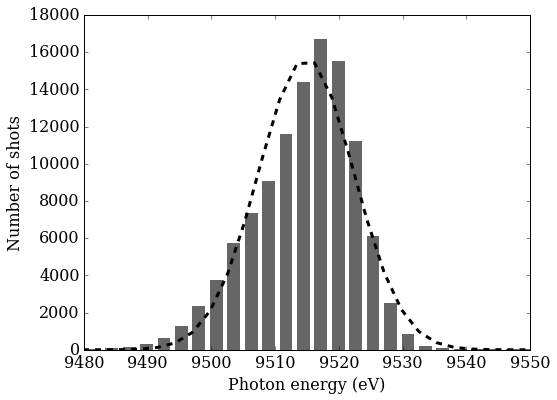

In [5]:
hist=np.histogram(PhE_ev,bins=200)
plt.figure(figsize=[8,6])
plt.xlim(9480,9550)

y=hist[0]
x=(hist[1][1:]+hist[1][:-1])/2.
coefs,_=curve_fit(gaussian,x,y,p0=[9600,200,10000])
print coefs
plt.plot(x,gaussian(x,*coefs), 'k--',linewidth=3)
plt.bar(x,y,color='k',width=2, alpha=0.6, linewidth=0)
e_center=coefs[0]

plt.xlabel('Photon energy (eV)', fontsize=16)
plt.ylabel('Number of shots', fontsize=16)

# plt.savefig('photon_energy_stats_run80_mu9514.9_sig7.5.png')

In [208]:
#constants
c = 2.998e8
h = 6.63e-34
ev_to_j = 1.602e-19

#experimental parameters
pmin=100
pmax=1100
det_dist=260e-3
pixsize=110e-6
delta_pix = 4

delta_l= delta_pix*pixsize

pix_l=np.arange(pmin,pmax,delta_pix)*pixsize
theta=0.5*np.arctan(pix_l/det_dist)

delta_q2 = 4*np.pi/(c*h) *\
np.cos(theta)*0.5*\
det_dist/(det_dist**2+pix_l**2) \
* e_center*ev_to_j*delta_l

delta_q1 = 4*np.pi/(c*h) * np.sin(theta) * np.abs(coefs[1]) * ev_to_j

qs = 4*np.pi/(c*h) *np.sin(theta) * e_center*ev_to_j

delta_e = delta_q2/np.sin(theta)*c*h/(4*np.pi)/ev_to_j

In [209]:
(theta/np.pi*180).min(),(theta/np.pi*180).max()

(1.2113037290618847, 12.438396051252992)

In [210]:
print delta_e.min(),delta_e.max()
print np.abs(coefs[1])
print delta_q1.min()*1e-10, delta_q1.max()*1e-10
print delta_q2.min()*1e-10, delta_q2.max()*1e-10

30.0421627698 380.084166225
7.5097661902
0.000160787285981 0.00163824456075
0.00655365406916 0.00813776354467


(35,)

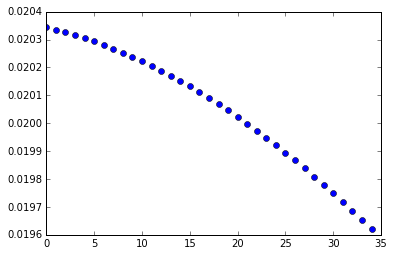

In [105]:
plt.plot(delta_q2*1e-10,'o')
delta_q2.shape

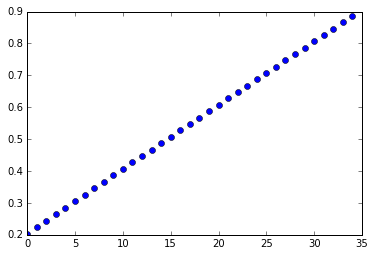

In [108]:
qs/1e10
plt.plot(qs/1e10,'o')

In [147]:
run_files=np.array(glob.glob('/reg/d/psdm/cxi/cxilp6715/results/combined_tables/finer_q/*tbl'))
run_nums=np.array([int(ff.split('un')[-1].split('.')[0]) for ff in run_files])
order = np.argsort(run_nums)
run_files=run_files[order]
all_e_centers=np.zeros(run_files.size)
all_sigs=np.zeros(run_files.size)
for idx,ff in enumerate(run_files):
    f=h5py.File(ff,'r')
    PhE_ev=np.nan_to_num(f['ebeam']['photon_energy'].value)
    
    hist=np.histogram(PhE_ev,bins=200)

    y=hist[0]
    x=(hist[1][1:]+hist[1][:-1])/2.
    coefs,_=curve_fit(gaussian,x,y,p0=[9600,200,10000])

    e_center=coefs[0]
    e_sig = np.abs(coefs[1])
    
    all_e_centers[idx]=e_center
    all_sigs[idx]=e_sig

9507.40799225 18.3027819858


(9380, 9600)

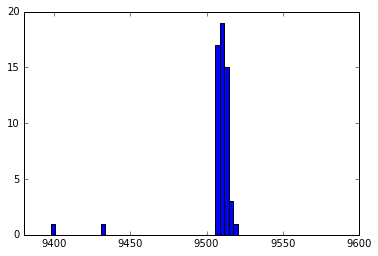

In [185]:
print all_e_centers[all_e_centers>9200].mean(), all_e_centers[all_e_centers>9200].std()
_=plt.hist(all_e_centers,bins=550)
plt.xlim(9380,9600)

[83]


(9300, 9550)

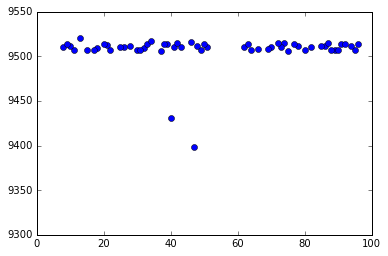

In [152]:
plt.plot(run_nums,all_e_centers,'o')
print run_nums[all_e_centers<9300]
plt.ylim(9300,9550)

[83]


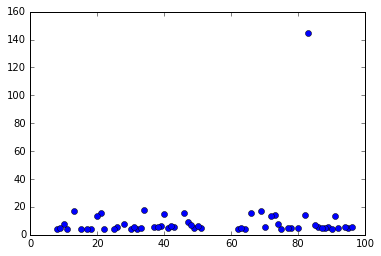

In [155]:
plt.plot(run_nums,all_sigs,'o')
print run_nums[all_sigs>100]